**IMPORTANTO AS BIBLIOTECAS**

In [0]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

**DEFININDO A BASE DE DADOS**

In [0]:
data_table = pd.DataFrame({'Peso': np.array([40.0, 93.5, 35.5, 30.0, 52.0, 17.0, 38.5,  8.5, 33.0,  9.5, 21.0, 79.0]) / 2.205,
                            'Altura': np.array([42.8, 63.5, 37.5, 39.5, 45.5, 38.5, 43.0, 22.5, 37.0, 23.5, 33.0, 58.0]) / 39.37,
                            'Cateter': [37, 50, 34, 36, 43, 28, 37, 20, 34, 30, 38, 47]},
                            dtype='float')

In [3]:
data_table

,Peso,Altura,Cateter
0,18.140590,1.087122,37.0
1,42.403628,1.612903,50.0
2,16.099773,0.952502,34.0
3,13.605442,1.003302,36.0
4,23.582766,1.155702,43.0
5,7.709751,0.977902,28.0
6,17.460317,1.092202,37.0
7,3.854875,0.571501,20.0
8,14.965986,0.939802,34.0
9,4.308390,0.596901,30.0


**EXTRAINDO OS DADOS PARA ARRAY**

In [0]:
X = data_table[['Peso', 'Altura']].values
y = data_table[['Cateter']].values

**NORMALIZAÇÃO DOS DADOS**


In [0]:
def normalization(X, normalization_type='std'):
    X_mean = X.mean(axis = 0)
    X_std = X.std(axis = 0)
    return (X-X_mean)/ X_std, X_mean, X_std

def denormalization(X, X_mean, X_std, normalization_type='std'):
    return (X*X_std) + X_mean

In [0]:
X_norm, X_mean, X_std = normalization(X)
y_norm, y_mean, y_std = normalization(y)

In [0]:
y_denorm = denormalization(y_norm,y_mean, y_std)
X_denorm = denormalization(X_norm,X_mean, X_std)

**FUNÇÃO PARA INSERIR A COLUNA DE 1s EM X**

In [0]:
def insert_ones(X):
    ones = np.ones([X.shape[0],1])
    return np.concatenate((ones,X) , axis=1)

**DEFININDO O CUSTO : MSE**

In [0]:
def custo(w,X,y):
    N = len(X)
    
    erro = (X@w.T - y)
    
    custo = np.sum(np.power(erro,2))
    
    return custo/N

**GRADIENTE DESCENDENTE**

In [0]:
def gd(w, X, y, alpha, epoch):
    cost = np.zeros(epoch)
    
    for i in range(epoch):
        
        w = w - (alpha/len(X)) * np.sum((X@w.T - y)*X, axis=0)
        
        cost[i] = custo(w, X, y)
    
    return w, cost 

**PEGANDO O NÚMERO DE FEATURES**

In [0]:
n_features = len(data_table.columns)-1

**Criando um vetor de W's baseado na quantidades de features**

In [12]:
## Gerando valores aleatórios entre 0 e 1
w = np.random.rand(1,n_features+1)
w


array([[0.1344836 , 0.36460543, 0.97229661]])

**INICIALIZANDO**

In [0]:
X_norm = insert_ones(X_norm)
alpha = 0.01
epoch = 800

**RODANDO O GD**

In [14]:
w, cost = gd(w, X_norm, y_norm, alpha, epoch)
w

array([[4.33336244e-05, 2.75978492e-01, 6.40498744e-01]])

**CUSTO FINAL**

In [15]:
custo(w,X_norm, y_norm)

0.1832669684887898

**MOSTRANDO O CUSTO**

Text(0.5, 1.0, 'Erro vs. Epoch')

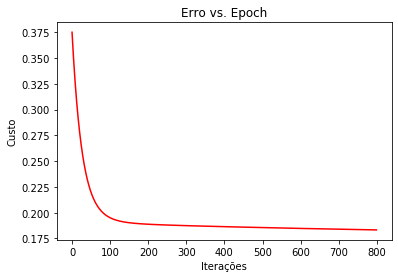

In [16]:
#plotando o custo
fig, ax = plt.subplots()  
ax.plot(np.arange(epoch), cost, 'r')  
ax.set_xlabel('Iterações')  
ax.set_ylabel('Custo')  
ax.set_title('Erro vs. Epoch')

**PREDIÇÃO**

In [17]:
X_ent =(np.array([20, 1.4 ])-X_mean) / X_std

X_ent = np.concatenate((np.array([1]) , X_ent),axis=0)
X_ent

array([1.        , 0.23949447, 1.29159353])

In [18]:
y_pred = X_ent@w.T
y_pred

array([0.89340269])

**DESNORMALIZANDO O VALOR PREDITO PELO MODELO**

In [0]:
pred =y_pred*y_std + y_mean

In [22]:
pred

array([43.16181892])